In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

## Data Load

We used MNIST data from the pytorch library, normalizing by its mean(0.1307), and its std(0.3081).


In [2]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.1307,), (0.3081,))])
#from online: the mean of MNIST is 0.1307, the std 0.3081
# https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457

trainset = torchvision.datasets.MNIST(root= '../data', train=True,
                                        download=True, transform=transform)
#keep batches in 4
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='../data', train=False,
                                        download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                          shuffle=True, num_workers=2)

In [3]:
classes = tuple(str(x) for x in range(10))

In [4]:
def imgshow(img):
    img = img*0.3081 + 0.1307
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

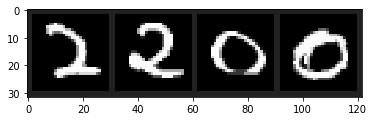

    2     2     0     0


In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imgshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
#batchsize is 4, which is we can show images in groups of 4

## Define the Neural Network

This neural network was taken from the pytorch example for MaxPooling on the MNIST dataset. Since the model performs with good accuracy, we stay with their model.
https://github.com/pytorch/examples/tree/1de2ff9338bacaaffa123d03ce53d7522d5dcc2e/mnist

In [18]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

net = Net()

Use Cross Entropy Loss, SGD, find running loss and testing error per epoch

In [22]:
net = Net()
train_error = []
test_error = []

#loss function
criterion = nn.CrossEntropyLoss()
#stochastic gradient descent
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


for epoch in range(10):  # loop/over the dataset multiple times

    running_loss = 0.0
    num_images = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        num_images += inputs.size(1)
        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / num_images))
            train_error.append(running_loss / num_images)
            running_loss = 0.0
    
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        test_error.append(correct/total)
        

print('Finished Training')

[1,  1000] loss: 0.920
[1,  2000] loss: 0.194
[1,  3000] loss: 0.092
[1,  4000] loss: 0.059
[1,  5000] loss: 0.042
[1,  6000] loss: 0.034
[1,  7000] loss: 0.025
[1,  8000] loss: 0.020
[1,  9000] loss: 0.016
[1, 10000] loss: 0.013
[1, 11000] loss: 0.012
[1, 12000] loss: 0.012
[1, 13000] loss: 0.010
[1, 14000] loss: 0.009
[1, 15000] loss: 0.007
[2,  1000] loss: 0.097
[2,  2000] loss: 0.051
[2,  3000] loss: 0.035
[2,  4000] loss: 0.027
[2,  5000] loss: 0.017
[2,  6000] loss: 0.015
[2,  7000] loss: 0.013
[2,  8000] loss: 0.010
[2,  9000] loss: 0.011
[2, 10000] loss: 0.011
[2, 11000] loss: 0.009
[2, 12000] loss: 0.007
[2, 13000] loss: 0.006
[2, 14000] loss: 0.007
[2, 15000] loss: 0.007
[3,  1000] loss: 0.074
[3,  2000] loss: 0.041
[3,  3000] loss: 0.023
[3,  4000] loss: 0.019
[3,  5000] loss: 0.012
[3,  6000] loss: 0.013
[3,  7000] loss: 0.012
[3,  8000] loss: 0.008
[3,  9000] loss: 0.008
[3, 10000] loss: 0.007
[3, 11000] loss: 0.007
[3, 12000] loss: 0.006
[3, 13000] loss: 0.006
[3, 14000] 

In [25]:
test_error = [1/i for i in test_error]

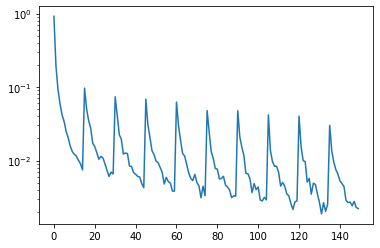

In [28]:
plt.figure()
plt.semilogy(train_error)

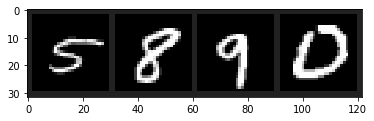

GroundTruth:      5     8     9     0
Predicted:      5     8     9     0


In [67]:
images, labels = dataiter.next()
imgshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

In [68]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the ' + str(len(testloader)) + ' test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 2500 test images: 98 %
